In [1]:
%matplotlib inline
import tensorflow as tf
import keras.backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys; sys.path.append('..')

Using TensorFlow backend.


### Build 

In [4]:
from tensorflow_models.mains.train import *

MODEL_NAME = 'kate'

K.clear_session()
config_file = REGISTERED_MODELS[MODEL_NAME][1] + '.yaml'
print('Using config file: {}'.format(config_file))
model_env = importlib.import_module('tensorflow_models.' + REGISTERED_MODELS[MODEL_NAME][0])

config = Config(config_file)

model, _, logger = build(config, **model_env.__dict__)

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
../tensorflow_models/base/config.py:43: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = parse_config(yaml.load(yaml_file))
../tensorflow_models/base/config.py:165: UserWarning: No check for amplification
  warnings.warn("No check for {}".format(attr))
../tensorflow_models/base/config.py:165: UserWarning: No check for callback_flags
  warnings.warn("No check for {}".format(attr))
../tensorflow_models/base/config.py:165: UserWarning: No check for callbacks
  warnings.warn("No check for {}".format(attr))
../tensorflow_models/base/config.py:165: UserWarning: No check for classification_loss
  warnings.warn("No check for {}".format(attr))
../tensorflow_models/base/config.py:165: UserWarning: No check for competitive_topk
  warnings.warn("No check for {}".format(attr))
../te

Using config file: sskate.yaml


[D 190729 18:05:59 logger:20] Training set loaded in 0.09 s: 9051 training examples, 2263 validation examples
[D 190729 18:05:59 logger:20] Supervised examples: 200 out of 9051
[D 190729 18:05:59 logger:20] Testing set loaded in 0.03 s: 7532 testing examples
[D 190729 18:05:59 logger:20] Total time: 0.13 s
[D 190729 18:05:59 logger:20] An empty vectorizer was instantiated.
[D 190729 18:06:02 logger:20] Num features: 17455
../tensorflow_models/utils/np_utils.py:50: RuntimeWarning: overflow encountered in exp
  
../tensorflow_models/utils/np_utils.py:50: RuntimeWarning: invalid value encountered in true_divide
  
[D 190729 18:06:15 logger:20] Activation for encoder layer: tanh


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


[D 190729 18:06:15 logger:20] add k-competitive layer


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


[I 190729 18:06:16 logger:17] __________________________________________________________________________________________________
[I 190729 18:06:16 logger:17] Layer (type)                    Output Shape         Param #     Connected to                     
[I 190729 18:06:16 logger:17] ==================================================================================================
[I 190729 18:06:16 logger:17] document_input (InputLayer)     (None, 17455)        0                                            
[I 190729 18:06:16 logger:17] __________________________________________________________________________________________________
[I 190729 18:06:16 logger:17] dropout_1 (Dropout)             (None, 17455)        0           document_input[0][0]             
[I 190729 18:06:16 logger:17] __________________________________________________________________________________________________
[I 190729 18:06:16 logger:17] encoder_layer1 (Dense)          (None, 128)          2234368     dr

Instructions for updating:
Use tf.cast instead.


In [5]:
X, y, _ = model.generator.validation
features = np.array(model.generator.vectorizer.get_feature_names())
num_features = len(features)
target_names = model.generator.target_names

### Train

In [4]:
try:
    start = timeit.default_timer()
    model.train()
    logger.info('runtime: {:.2f}s'.format(timeit.default_timer() - start))
except KeyboardInterrupt:
    pass
finally:
    # import ipdb; ipdb.set_trace()
    results = model.evaluate(subset='validation')
    logger.info('; '.join(['{}: {:.4f}'.format(k, v) for k, v in results.items()]))
    logger.info('results saved in {}'.format(config.output_dir))

Instructions for updating:
Use tf.cast instead.
Train on 9051 samples, validate on 2263 samples
Epoch 1/100
9051/9051 [==============================] - 6s 654us/step - loss: 2.8218 - reconstruction_loss: 4.0211 - logits_loss: 1.6226 - logits_masked_accuracy: 0.0141 - val_loss: 3.3690 - val_reconstruction_loss: 3.7329 - val_logits_loss: 3.0051 - val_logits_masked_accuracy: 0.0517
Epoch 2/100
9051/9051 [==============================] - 5s 594us/step - loss: 2.2452 - reconstruction_loss: 2.9496 - logits_loss: 1.5408 - logits_masked_accuracy: 0.0277 - val_loss: 3.3419 - val_reconstruction_loss: 3.6988 - val_logits_loss: 2.9849 - val_logits_masked_accuracy: 0.0773
Epoch 3/100
9051/9051 [==============================] - 5s 593us/step - loss: 2.2309 - reconstruction_loss: 2.9247 - logits_loss: 1.5371 - logits_masked_accuracy: 0.0778 - val_loss: 3.3111 - val_reconstruction_loss: 3.6570 - val_logits_loss: 2.9653 - val_logits_masked_accuracy: 0.0539
Epoch 4/100
9051/9051 [====================

[I 190725 00:02:59 logger:17] 01 [train loss: 2.8218 reconstruction_loss: 4.0211 logits_loss: 1.6226 logits_masked_accuracy: 0.0141] [val val_loss: 3.3690 val_reconstruction_loss: 3.7329 val_logits_loss: 3.0051 val_logits_masked_accuracy: 0.0517]
[I 190725 00:02:59 logger:17] 02 [train loss: 2.2452 reconstruction_loss: 2.9496 logits_loss: 1.5408 logits_masked_accuracy: 0.0277] [val val_loss: 3.3419 val_reconstruction_loss: 3.6988 val_logits_loss: 2.9849 val_logits_masked_accuracy: 0.0773]
[I 190725 00:02:59 logger:17] 03 [train loss: 2.2309 reconstruction_loss: 2.9247 logits_loss: 1.5371 logits_masked_accuracy: 0.0778] [val val_loss: 3.3111 val_reconstruction_loss: 3.6570 val_logits_loss: 2.9653 val_logits_masked_accuracy: 0.0539]
[I 190725 00:02:59 logger:17] 04 [train loss: 2.1421 reconstruction_loss: 2.8870 logits_loss: 1.3971 logits_masked_accuracy: 0.0919] [val val_loss: 3.2805 val_reconstruction_loss: 3.6095 val_logits_loss: 2.9515 val_logits_masked_accuracy: 0.0685]
[I 190725 00

[I 190725 00:03:20 logger:17] ==================================================
[I 190725 00:03:20 logger:17] Final accuracy: 46.49% f1 score: 46.19%
[I 190725 00:03:20 logger:17]                           precision    recall  f1-score   support
[I 190725 00:03:20 logger:17] 
[I 190725 00:03:20 logger:17]              alt.atheism       0.71      0.24      0.35       102
[I 190725 00:03:20 logger:17]            comp.graphics       0.35      0.28      0.31       118
[I 190725 00:03:20 logger:17]  comp.os.ms-windows.misc       0.31      0.73      0.44       118
[I 190725 00:03:20 logger:17] comp.sys.ibm.pc.hardware       0.39      0.46      0.42       109
[I 190725 00:03:20 logger:17]    comp.sys.mac.hardware       0.50      0.16      0.24       102
[I 190725 00:03:20 logger:17]           comp.windows.x       1.00      0.08      0.15       101
[I 190725 00:03:20 logger:17]             misc.forsale       0.73      0.31      0.44       115
[I 190725 00:03:20 logger:17]                rec.a

In [5]:
# encoding = model.encoder.predict(X)
# targets = np.argmax(y, axis=1)
# for i, c in enumerate(list('brg')):
#     mask = targets == i
#     plt.scatter(encoding[mask, 0], encoding[mask, 1], c=c, alpha=0.2)

In [5]:
W_enc, _, W_clf, _ = model.classifier.get_weights()

In [6]:
from scipy.stats import entropy

def softmax(array):
    one_dim = array.ndim < 2
    if one_dim:
        array = array.reshape(1, -1)
    proba = np.exp(array) / np.exp(array).sum(axis=1, keepdims=True)
    if one_dim:
        return proba.ravel()
    return proba

def scale(array):
    return (array - array.min()) / (array.max() - array.min())

def bce(targets, predictions):
    assert all(ar.ndim == 2 for ar in (targets, predictions))
    N = targets.shape[1]
    return -1/N * (targets * np.log(predictions) + (1 - targets) * np.log(1 - predictions)).sum(axis=1)

def kl_divergence(x1, x2):
    return entropy(x1, x2)

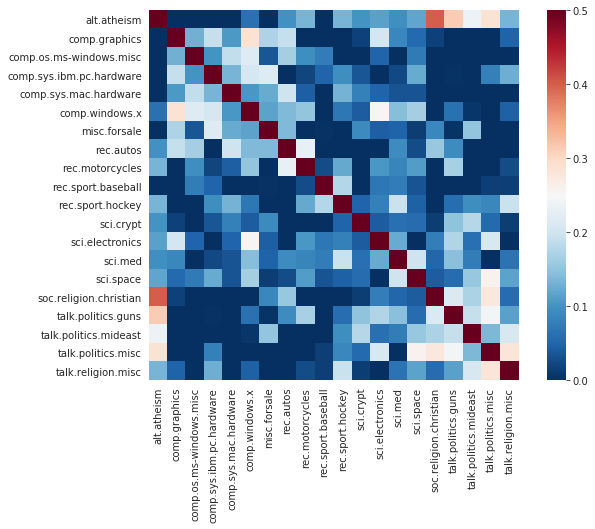

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

# plt.figure(figsize=(12, 10))
sns.heatmap(cosine_similarity(W_clf.T), 
            xticklabels=target_names, 
            yticklabels=target_names, 
            vmin=0, vmax=0.5, 
            square=True,
            cmap='RdBu_r')

fig = plt.gcf()
fig.set_size_inches([x * 1.7 for x in fig.get_size_inches()])
plt.savefig('cosine_similarity_clf_weights.eps')

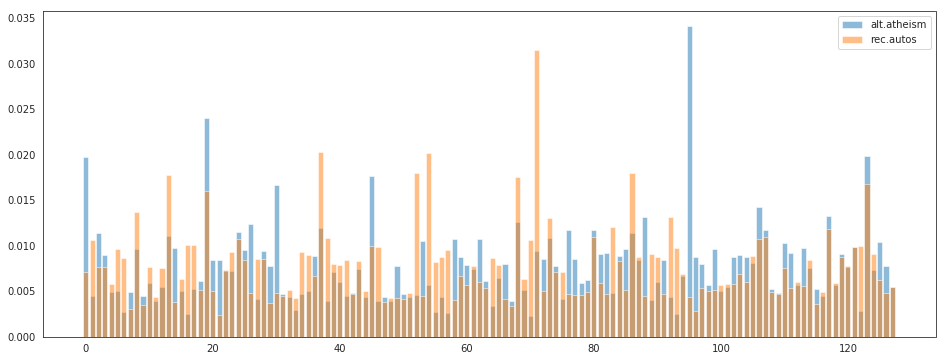

In [15]:
selection = ['alt.atheism', 'rec.autos'] #

# fig, axs = plt.subplots(5, 4, figsize=(16,16))
fig, ax = plt.subplots(1, 1, figsize=(16,6))
for target_id in range(W_clf.shape[1]):
#     ax = axs[target_id % 5, target_id // 5]
    category_name = model.generator.target_names[target_id]
    if category_name in selection:
        topics_given_class = pd.DataFrame()
        ax.bar(np.arange(128), softmax(W_clf[:, target_id]), alpha=0.5, label=category_name)
        
plt.legend();

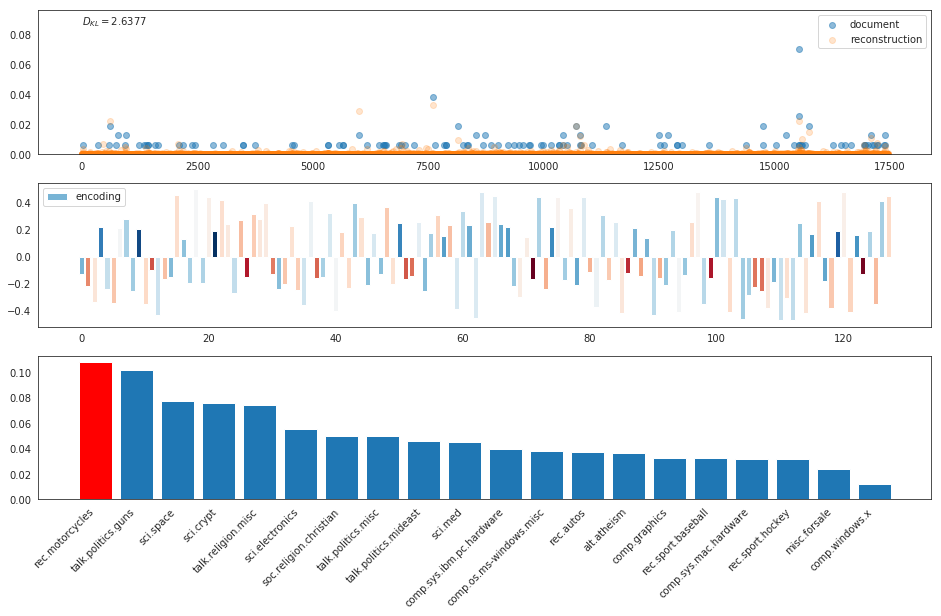

In [16]:
random_indice = np.random.randint(0, len(X))
doc, target = X[random_indice], np.argmax(y[random_indice])
label = model.generator.target_names[target]
words = features[doc.astype('bool')]

reconstruction, predictions = model.autoencoder.predict(doc.reshape(1, -1))
code = model.encoder.predict(doc.reshape(1, -1)).ravel()
reconstruction, predictions = reconstruction.ravel(), predictions.ravel()
# reconstruction /= reconstruction.sum()

indices = np.arange(num_features)
doc_mask = doc > 0
x_doc, y_doc = indices[doc_mask], doc[doc_mask]
rec_mask = np.ones_like(reconstruction, dtype='bool')  # > 2e-3
x_rec, y_rec = indices[rec_mask], reconstruction[rec_mask]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,9))

# Document and reconstruction
ax1.scatter(x_doc, y_doc, alpha=0.5, label='document')
ax1.scatter(x_rec, y_rec, alpha=0.2, label='reconstruction')
ax1.set_ylim((0, ax1.get_ylim()[1]))
ax1.text(0., ax1.get_ylim()[1] * .9, "$D_{{KL}} = {:.4f}$".format(kl_divergence(doc, reconstruction)))
ax1.legend()

# Encoding
cmap = plt.get_cmap('RdBu_r')
colors = list(map(cmap, scale(W_clf[:, target])))
ax2.bar(np.arange(len(code)), code, color=colors, label='encoding')
ax2.legend()

# Label prediction
predictions = (pd.DataFrame({'predictions': softmax(predictions)}, index=target_names)
               .sort_values('predictions', ascending=False))
predictions_bars = ax3.bar(np.arange(len(predictions)), predictions['predictions'])
predictions_bars[list(predictions.index).index(label)].set_facecolor('r')
ax3.set_xticks(np.arange(len(predictions)))
ax3.set_xticklabels(predictions.index, rotation=45, ha="right");

('doc', 0.0, 0.07006369426751592, 'R', 8.083252e-10, 0.032681294)

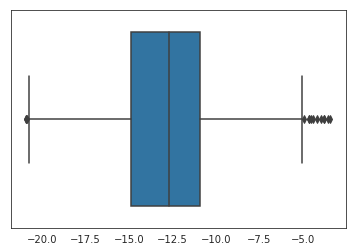

In [19]:
sns.boxplot(np.log(reconstruction))
'doc', doc.min(), doc.max(), 'R', reconstruction.min(), reconstruction.max()

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X, y, m = model.generator.get_dataset(3)
Xt, yt = model.generator.get_dataset(2, 'test')
yt = np.argmax(yt, axis=1)
Xs, ys = X[m], np.argmax(y[m], axis=1)

clf = SVC(kernel='linear', probability=True).fit(Xs, ys)
train_pred = clf.predict(Xs)
test_pred = clf.predict(Xt)
print(classification_report(ys, train_pred))
print(classification_report(yt, test_pred))
# print("Training score: {:.2%}".format(clf.score(Xs, ys)))
# print("Training score: {:.2%}".format(clf.score(Xs, ys)))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       1.00      0.10      0.18        10
           2       0.62      0.80      0.70        10
           3       1.00      0.10      0.18        10
           4       1.00      0.40      0.57        10
           5       1.00      0.30      0.46        10
           6       0.88      0.70      0.78        10
           7       1.00      0.20      0.33        10
           8       0.53      0.90      0.67        10
           9       1.00      0.10      0.18        10
          10       1.00      0.20      0.33        10
          11       0.73      0.80      0.76        10
          12       1.00      0.30      0.46        10
          13       0.14      1.00      0.25        10
          14       0.53      0.90      0.67        10
          15       0.73      0.80      0.76        10
          16       0.69      0.90      0.78        10
          17       0.83    

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
code_s = model.encoder.predict(Xs)
code_t = model.encoder.predict(Xt)
clf = SVC(kernel='rbf').fit(code_s, ys)
print(classification_report(yt, clf.predict(code_t)))

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.39      0.43      0.41       319
           1       0.62      0.18      0.28       389
           2       0.25      0.64      0.36       394
           3       0.38      0.27      0.32       392
           4       0.47      0.14      0.21       385
           5       0.50      0.00      0.01       395
           6       0.82      0.23      0.36       390
           7       0.68      0.05      0.10       396
           8       0.75      0.51      0.60       398
           9       0.80      0.09      0.16       397
          10       0.95      0.09      0.16       399
          11       0.82      0.47      0.60       396
          12       0.51      0.06      0.11       393
          13       0.21      0.66      0.32       396
          14       0.25      0.77      0.38       394
          15       0.35      0.37      0.36       398
          16       0.23      0.44      0.30       364
          17       0.81    

In [42]:
from sklearn.metrics import confusion_matrix
hard_rec = np.where(reconstruction > 0.5, np.ones_like(reconstruction), np.zeros_like(reconstruction))
features[doc != hard_rec]

array(['am', 'an', 'any', 'but', 'cannot', 'cdrom', 'client', 'connect',
       'disks', 'doesnt', 'error', 'ethernet', 'for', 'from', 'gateway',
       'get', 'good', 'hangs', 'henrik', 'im', 'install', 'ipc', 'just',
       'local', 'make', 'messages', 'postscript', 'powerbook', 'problem',
       'scanner', 'sun', 'svga', 'there', 'this', 'using', 'way', 'when',
       'why', 'with', 'work', 'working', 'works', 'xlib', 'xterm',
       'xterminal', 'xwindows'], dtype='<U43')

In [35]:
words

array(['am', 'an', 'any', 'but', 'cannot', 'connect', 'doesnt', 'error',
       'from', 'get', 'good', 'have', 'henrik', 'im', 'ipc', 'it', 'just',
       'local', 'make', 'messages', 'on', 'postscript', 'problem', 'sun',
       'that', 'there', 'using', 'way', 'when', 'why', 'work', 'working',
       'works', 'xterminal'], dtype='<U43')

In [36]:
features[reconstruction > 0.5]

array(['cdrom', 'client', 'disks', 'ethernet', 'for', 'gateway', 'hangs',
       'have', 'install', 'it', 'on', 'powerbook', 'scanner', 'svga',
       'that', 'this', 'with', 'xlib', 'xterm', 'xwindows'], dtype='<U43')

In [61]:
thresh = 1e-3
reconstruction[np.abs(reconstruction) > thresh].shape

(5826,)

In [7]:
from tensorflow_models.utils import Logger
from tensorflow_models.data_loaders import TfIdfGenerator, load_newsgroups as load_data
from tensorflow_models.base import Config
from tensorflow_models.semi_supervised.kate import Model
from tensorflow_models.utils.nn_utils import masked_accuracy

import warnings

def build_model():
    warnings.simplefilter('ignore')
    config = Config('kate.yaml', {'log_level': 'ERROR'}) 
    logger = Logger(config)
    generator = TfIdfGenerator(load_data, config, logger)
    model = Model(generator, config, logger)
    model.compile()
    return model

K.clear_session()
model = build_model()

In [12]:
autoencoder = model.autoencoder

# input placeholders
inputs, targets, sample_weights = autoencoder.inputs, autoencoder.targets, autoencoder.sample_weights
input_tensors = inputs + targets + sample_weights

# network tensors
outputs, loss = autoencoder.outputs, autoencoder.total_loss

# input data
data = model.get_network_inputs()
input_data, output_data, _ = [[d[:100] for d in data[s]] if type(data[s]) == list else [data[s][:100]] for s in data]

fd = {k: v for k, v in zip(inputs + targets + sample_weights, input_data + output_data + [np.ones(100)] * len(sample_weights))}
fd[K.learning_phase()] = 1

accuracy = masked_accuracy(targets[1], outputs[1])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
#     out = sess.run(outputs + [loss], feed_dict=fd)
#     Xhat, yhat, l = out[:-1], out[-1]
    acc = sess.run(accuracy, feed_dict=fd)

    print(acc)

Tensor("truediv_2:0", shape=(), dtype=float32)
0.0


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
attention_vec (Dense)           (None, 32)           1056        input_7[0][0]                    
__________________________________________________________________________________________________
attention_mul (Multiply)        (None, 32)           0           input_7[0][0]                    
                                                                 attention_vec[0][0]              
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 64)           2112        attention_mul[0][0]              
__________

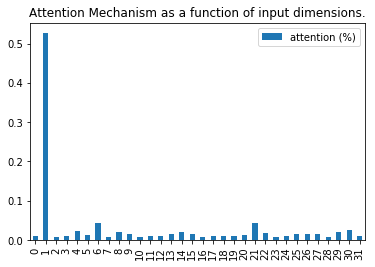

In [9]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.merge import multiply

input_dim = 32


def get_activations(model, inputs, print_shape_only=False, layer_name=None):
    # Documentation is available online on Github at the address below.
    # From: https://github.com/philipperemy/keras-visualize-activations
    print('----- activations -----')
    activations = []
    inp = model.input
    if layer_name is None:
        outputs = [layer.output for layer in model.layers]
    else:
        outputs = [layer.output for layer in model.layers if layer.name == layer_name]  # all layer outputs
    funcs = [K.function([inp] + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions
    layer_outputs = [func([inputs, 1.])[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations

def get_data(n, input_dim, attention_column=1):
    x = np.random.standard_normal(size=(n, input_dim))
    y = np.random.randint(low=0, high=2, size=(n, 1))
    x[:, attention_column] = y[:, 0]
    return x, y


def build_model():
    inputs = Input(shape=(input_dim,))

    # ATTENTION PART STARTS HERE
    attention_probs = Dense(input_dim, activation='softmax', name='attention_vec')(inputs)
    attention_mul = multiply([inputs, attention_probs], name='attention_mul')
    # ATTENTION PART FINISHES HERE

    attention_mul = Dense(64)(attention_mul)
    output = Dense(1, activation='sigmoid')(attention_mul)
    model = Model(inputs=[inputs], outputs=output)
    return model


N = 10000
inputs_1, outputs = get_data(N, input_dim)

m = build_model()
m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
m.summary()

m.fit([inputs_1], outputs, epochs=20, batch_size=64, validation_split=0.5, verbose=0)

testing_inputs_1, testing_outputs = get_data(1, input_dim)

# Attention vector corresponds to the second matrix.
# The first one is the Inputs output.
attention_vector = get_activations(m, testing_inputs_1,
                                   print_shape_only=True,
                                   layer_name='attention_vec')[0].flatten()

attention_vector = pd.DataFrame(attention_vector, columns=['attention (%)'])
attention_vector.plot(kind='bar', title='Attention Mechanism as a function of input dimensions.');

In [92]:
from tensorflow_models.utils.custom_layers import TiedConv1D
from keras.layers import Conv1D, MaxPool1D, UpSampling1D
from keras.models import Sequential

conv1 = Conv1D(32, 2, activation='relu', padding='same')
pool1 = MaxPool1D(5)
conv2 = Conv1D(64, 2, activation='relu', padding='same')
pool2 = MaxPool1D(5)
# dconv1 = Conv1D(64, 2, activation=None, padding='same')
dconv1 = TiedConv1D(64, 2, conv2, activation=None, padding='same')
up1 = UpSampling1D(5)
# dconv2 = Conv1D(32, 2, activation=None, padding='same')
dconv2 = TiedConv1D(32, 2, conv1, activation=None, padding='same')
up2 = UpSampling1D(5)

model = Sequential([
    conv1, pool1, conv2, pool2, 
    dconv1, up1, dconv2, up2
])
model.build((None, 1000, 1))
model.summary()


ValueError: number of input channels does not match corresponding dimension of filter, 40 != 2

In [69]:
import numpy as np


D = 128
N = 32
K = 20

def one_hot(ar, c):
    out = np.zeros((ar.shape[0], c), dtype='int32')
    for i, x in enumerate(ar):
        out[i, x] = 1
    return out

mu = np.random.rand(K, D)
rs = one_hot(np.random.randint(0, K, (N,)), K)
xs = np.random.normal(8, 3, size=(N, D))
print(mu.shape, rs.shape, xs.shape)


def unsupervised_loss(mu):
    centroids = mu
    
    def loss(x, r):
        N, K = tf.shape(x)[0], tf.shape(centroids)[0]
        x = tf.tile(tf.expand_dims(x, 1), [1, K, 1])
        dist = tf.sqrt(tf.reduce_sum(tf.square(x - centroids), axis=-1))
        r = tf.cast(r, 'float32')
        return tf.reduce_sum(r * dist)

    return loss


tf_x = tf.placeholder('float32', (None, D))
tf_mu = tf.placeholder('float32', (K, D))
tf_r = tf.placeholder('int32', (None, K))

loss_func = unsupervised_loss(tf_mu)
loss = loss_func(tf_x, tf_r)

with tf.Session() as sess:
    cost = sess.run(loss, feed_dict={tf_x: xs, tf_r: rs, tf_mu: mu})
    print(cost)

(20, 128) (32, 20) (32, 128)
(?, 20, 128) (20, 128)
2931.9863


In [56]:
x = tf.tile(tf.expand_dims(tf_x, 1), [1,K,1])

with tf.Session() as sess:
    print(sess.run(x, feed_dict={tf_x: xs}).shape)

(32, 20, 128)


In [ ]:
from keras import callbacks
from tensorflow_models.base import Config

cfg = Config('keras_model.yaml')

tb_opts = cfg.callbacks['TensorBoard']

getattr(callbacks, 'TensorBoard')(**tb_opts)

../tensorflow_models/base/config.py:198: UserWarning: No check for callbacks
  warnings.warn("No check for {}".format(attr))


In [2]:
from tensorflow_models.utils import Logger
from tensorflow_models.base import Config
from tensorflow_models.data_loaders import load_newsgroups, TfIdfGenerator
from tensorflow_models.semi_supervised.kate.model import AutoEncoder
from tensorflow_models.utils.nn_utils import masked_supervised_loss


cfg = Config('kate.yaml')
logger = Logger(cfg)
generator = TfIdfGenerator(load_newsgroups, cfg, logger)
ae = AutoEncoder(generator, cfg, logger)

../tensorflow_models/base/config.py:190: UserWarning: No check for competitive_topk
  warnings.warn("No check for {}".format(attr))
../tensorflow_models/base/config.py:190: UserWarning: No check for competitive_type
  warnings.warn("No check for {}".format(attr))
../tensorflow_models/base/config.py:190: UserWarning: No check for encoder_dims
  warnings.warn("No check for {}".format(attr))
../tensorflow_models/base/config.py:190: UserWarning: No check for normalization
  warnings.warn("No check for {}".format(attr))
../tensorflow_models/base/config.py:190: UserWarning: No check for topic_strength
  warnings.warn("No check for {}".format(attr))
../tensorflow_models/base/config.py:190: UserWarning: No check for words_per_topic
  warnings.warn("No check for {}".format(attr))
[D 190404 18:17:36 logger:20] Training set loaded: 9051 training examples, 2263 validation examples
[D 190404 18:17:36 logger:20] Supervised examples: 9051 out of 9051
[D 190404 18:17:36 logger:20] Testing set loaded: 

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


[I 190404 18:17:40 logger:17] __________________________________________________________________________________________________
[I 190404 18:17:40 logger:17] Layer (type)                    Output Shape         Param #     Connected to                     
[I 190404 18:17:40 logger:17] ==================================================================================================
[I 190404 18:17:40 logger:17] document_input (InputLayer)     (None, 20752)        0                                            
[I 190404 18:17:40 logger:17] __________________________________________________________________________________________________
[I 190404 18:17:40 logger:17] encoder_layer1 (Dense)          (None, 128)          2656384     document_input[0][0]             
[I 190404 18:17:40 logger:17] __________________________________________________________________________________________________
[I 190404 18:17:40 logger:17] k_competitive_1 (KCompetitive)  (None, 128)          0           en

In [6]:
# ae.classifier.compile(loss=masked_supervised_loss(ae), optimizer='adam')

def masked_supervised_loss(model):

    def supervised_loss(labels, logits):
        if K.ndim(labels) == 1 or labels.get_shape()[1] == 1:
            mask = tf.cast(tf.not_equal(labels, -1), 'int32')
            labels = tf.one_hot(tf.cast(labels, 'int32'), model.n_classes)
        else:
            mask = tf.cast(tf.not_equal(K.sum(labels, axis=1), 0), 'int32')

        return tf.losses.softmax_cross_entropy(labels, logits, weights=mask)

    return supervised_loss


def one_hot(ar):
    out = np.zeros((ar.shape[0], 20), dtype='int32')
    for i, x in enumerate(ar):
        if x == -1:
            continue
        out[i,x] = 1
    return out

tf_y = tf.placeholder('int32', (None, 20))
tf_X = ae.classifier.inputs[0]
logits = ae.classifier.outputs[0]
loss = masked_supervised_loss(ae)(tf_y, logits)

X, y, _ = generator.train
y = one_hot(y)
batch_indices = np.random.choice(np.arange(len(X)), 32, False)
Xb, yb = X[batch_indices], y[batch_indices]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    yhat = sess.run(logits, feed_dict={tf_X: Xb})
    ce = sess.run(loss, feed_dict={tf_X: Xb, tf_y: yb})

print(yhat.shape)
print(ce)

(32, 20)
2.9957416
